## Hierarchical Clustering

By applying Hierarchical Clustering (HC), very similar to K-means, same as K-Means but different processes.

### Agglomerative

Note: Divisive is the reverse of Agglomerative

1. Make each data point as a single-point cluster - becomes N clusters.
2. Take two closest data points and make them one cluster - N-1
3. Take two **closest clusters** and make them one cluster - N-2
4. Repeat Step 3 until there is only **one cluster**
**Note:** HC maintains a memory on how we get to this process.


* To find distance between clusters:
   * Euclidean Distance
<img src='../../resources/clustering/hierarchical/euclidean.png' />

**Distance between Clusters**
* This part is important
    1. Closest Points
    2. Furthest Points
    3. Average Distance
    4. Distance between Centroids

### Dendrograms
* Steps getting to **one cluster** saved in dendrograms.
* Height of dendrograms - Euclidean distance
<img src='../../resources/clustering/hierarchical/dendrograms.png' />

To use dendrograms:
   * We look at horizontal level, and set threshold
       * Distance threshold for similarity
           * We don't want similarity to be greater than this level(threshold).
               * Anything above this threshold, we don't want a cluster to have similarity(distance) above this threshold.
               * Two vertical lines = Two clusters
<img src='../../resources/clustering/hierarchical/dendrograms2.png' />
<img src='../../resources/clustering/hierarchical/dendrograms3.png' />

With this, we can them find the optimal threshold, thus optimal # of clusters.
   1. Select the vertical lines that when looking at the sides, do not cross any horizontal line.
   2. Then find the longest vertical line & draw a horizontal line through it.
   
<img src='../../resources/clustering/hierarchical/dendrograms4.png' />

<img src='../../resources/clustering/hierarchical/dendrograms5.png' />

<hr />

### Implementing HC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
df = pd.read_csv('data/call_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# No dependent variable y
# As ID, Gender, Age have no impact, so we remove it (demonstration).
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
# X = df.iloc[:, [3, 4]]
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Using Dendrogram to find the optimal number of clusters

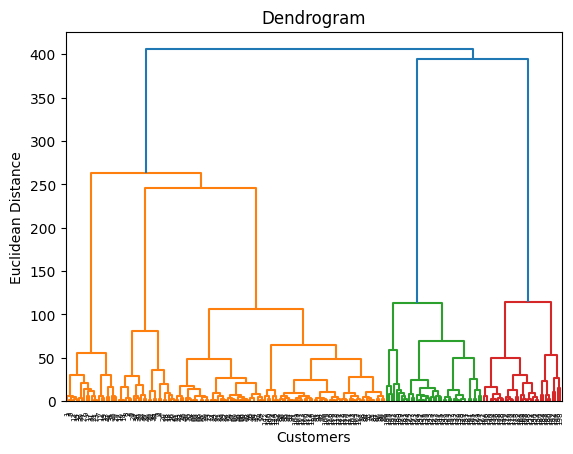

In [4]:
import scipy.cluster.hierarchy as sch
# Clustering technique = ward (Minimizing the variance)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance');

### Training HC model

In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

C:\Users\linta\anaconda3\envs\data_science_playground\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Visualizing clusters

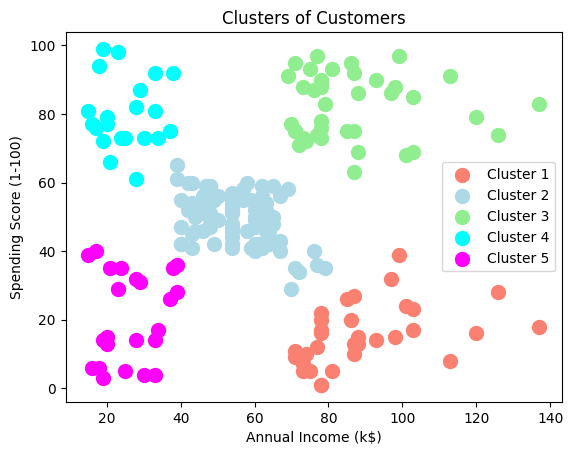

In [8]:
plt.scatter(
    X[y_hc == 0, 0],
    X[y_hc == 0, 1],
    s = 100,
    c = 'salmon',
    label='Cluster 1'
)
plt.scatter(
    X[y_hc == 1, 0],
    X[y_hc == 1, 1],
    s = 100,
    c = 'lightblue',
    label='Cluster 2'
)
plt.scatter(
    X[y_hc == 2, 0],
    X[y_hc == 2, 1],
    s = 100,
    c = 'lightgreen',
    label='Cluster 3'
)
plt.scatter(
    X[y_hc == 3, 0],
    X[y_hc == 3, 1],
    s = 100,
    c = 'cyan',
    label='Cluster 4'
)
plt.scatter(
    X[y_hc == 4, 0],
    X[y_hc == 4, 1],
    s = 100,
    c = 'magenta',
    label='Cluster 5'
)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();